# Морфология 2
В данном ноутбуке находится задание на триграммы и словарь. В качестве текста будем использовать томик войны и мира: https://goo.gl/qcVTLE 

Для начала напомним некоторые полезные инструменты на питоне

## 1. Инструменты

### 1.1. Регулярные выражения
Исчерпывающий пост https://habr.com/ru/post/349860/

In [1]:
import re

# С помощью рег. выражения можно искать, заменять и сентезировать строки по шаблонам
# Парочка простых примеров
numbers = re.findall(r'\d+', r'There is some numbers: 49 and 432')
print (u'Находим числа в строке: ', numbers)

print ( u'Простенький токенизатор: ', re.sub('[,\.?!]',' ','How, to? split. text!').split())

print (u'Еще один токенизатор: ', re.split(r'\W+', 'How, to? split. text! Again'))

# в качестве тренировки придумайте свой токенизатор в случае, когда из текста нужно получить только русские слова.
test_string = 'Лев Толстой-великий Russian writer!'
print('И еще один простой токенизатор:', re.sub(r'[^А-я]', ' ', test_string))

Находим числа в строке:  ['49', '432']
Простенький токенизатор:  ['How', 'to', 'split', 'text']
Еще один токенизатор:  ['How', 'to', 'split', 'text', 'Again']
И еще один простой токенизатор: Лев Толстой великий                


### 1.2. Чтение файлов
Чтобы не мучится самим с кодировками, приведем способ чтения файла корпуса.

In [2]:
import io
wordlilist = None
with io.open('wp.txt', "r", encoding='utf-8') as text_file:
    text = text_file.read().lower()
    wordlist = re.sub(r'[^А-я]', ' ', text).split()

### 1.3. ООП
В питоне можно создавать свои классы, скорее всего нам понадобится класс для хранения бора

In [3]:
#The structure is in the section 2.2

### 1.4. pyplot
Довольно часто приходится построить какие-нибудт графики и гистограммы для изучения данных, с которыми придется работать. Для этого в питоне есть удобнейший модуль для этого - pyplot. Туториал: https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html

In [4]:
#!pip install matplotlib # Установка модуля
import matplotlib.pyplot as plt
# команда чтобы картинки рисовались прямо в ноутбуке
%matplotlib inline 

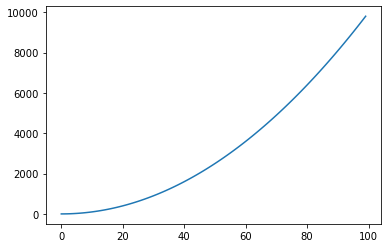

In [5]:
# Посмотрим на график функции x^2
data = [i * i for i in range(100)]
plt.plot(data)

(array([32., 13., 10.,  8.,  8.,  6.,  6.,  6.,  5.,  6.]),
 array([   0. ,  980.1, 1960.2, 2940.3, 3920.4, 4900.5, 5880.6, 6860.7,
        7840.8, 8820.9, 9801. ]),
 <BarContainer object of 10 artists>)

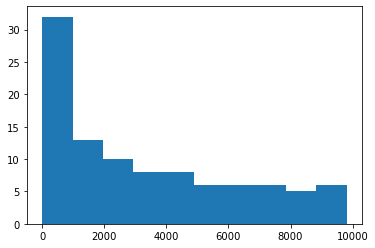

In [6]:
# и распределение по значениям
plt.hist(data)

Также полезная команда для подсчета времения выполнеия в ячейке

In [7]:
%%time
res = 0
for i in range(int(1e8)):
    res += 1

Wall time: 17.1 s


## 2. Задание
Собственно теперь нам потребуется написать подсчет триграмм и бор для словаря, чтобы реализовать простенькую систему исправления ошибок.

### 2.1. Триграммы
Для начала получим словарь триграмма - её кол-во в тексте, не забывая о начале и конце слова.

Далее можно построить гистограмму на кол-во вхождений триграмм, и посмотреть самые частые и какая частота у каких-нибудь заведомо странных, например: 'чгк', 'шкя' и подобные. Из полученных данных придумать эвристику, как считать слово с опечаткой. Проверить эвристику по словарю.

In [8]:
ngram = 3

In [9]:
from collections import Counter
def corpus_trigrams(word_list):
    '''returns trigrams count dictionary'''
    ngram_arr=[]

    for i in range(len(word_list)):
        for j in range (len(word_list[i])):
            cur_ngram = word_list[i][j:j+ngram]
            #print(cur_ngram, i, j)
            ngram_arr.append(cur_ngram)

        for k in range(ngram-1):
            cur_ngram = word_list[i][:k+1]
            #print(cur_ngram, i, k)
            ngram_arr.append(cur_ngram)
    result = dict(Counter(ngram_arr))
    return result

In [10]:
test_word_list = ['aaa', 'abcd']

In [11]:
corpus_trigrams(test_word_list)

{'aaa': 1, 'aa': 2, 'a': 3, 'abc': 1, 'bcd': 1, 'cd': 1, 'd': 1, 'ab': 1}

In [12]:
# Получим словарь на большом тексте
war_and_p_ngram = corpus_trigrams(wordlist)

In [13]:
war_and_p_ngram

{'лев': 94,
 'ев': 87,
 'в': 15888,
 'л': 6742,
 'ле': 520,
 'ник': 500,
 'ико': 365,
 'кол': 475,
 'ола': 149,
 'лае': 45,
 'аев': 3,
 'еви': 95,
 'вич': 71,
 'ич': 58,
 'ч': 3385,
 'н': 12327,
 'ни': 1526,
 'тол': 667,
 'олс': 34,
 'лст': 34,
 'сто': 1271,
 'той': 230,
 'ой': 1863,
 'й': 4959,
 'т': 7655,
 'то': 5594,
 'вой': 413,
 'ойн': 134,
 'йна': 20,
 'на': 6576,
 'а': 13055,
 'во': 1720,
 'и': 23156,
 'мир': 95,
 'ир': 79,
 'р': 3664,
 'м': 8382,
 'ми': 1799,
 'том': 579,
 'ом': 1682,
 'час': 388,
 'аст': 442,
 'сть': 471,
 'ть': 2567,
 'ь': 6626,
 'ча': 249,
 'пер': 1132,
 'ерв': 140,
 'рва': 33,
 'вая': 451,
 'ая': 1393,
 'я': 8978,
 'п': 9843,
 'пе': 857,
 'е': 12539,
 'пом': 210,
 'оме': 117,
 'мес': 214,
 'ест': 954,
 'тья': 44,
 'ья': 190,
 'по': 5065,
 'мой': 155,
 'мо': 1474,
 'вер': 651,
 'ерн': 230,
 'рны': 64,
 'ный': 377,
 'ый': 939,
 'ве': 926,
 'раб': 63,
 'аб': 70,
 'б': 4922,
 'ра': 1794,
 'ну': 725,
 'у': 6932,
 'что': 2058,
 'о': 21781,
 'чт': 2026,
 'кня': 12

(array([5.84e+03, 1.50e+01, 1.20e+01, 3.00e+00, 2.00e+00, 4.00e+00,
        1.00e+00, 0.00e+00, 0.00e+00, 2.00e+00]),
 array([1.00000e+00, 2.31650e+03, 4.63200e+03, 6.94750e+03, 9.26300e+03,
        1.15785e+04, 1.38940e+04, 1.62095e+04, 1.85250e+04, 2.08405e+04,
        2.31560e+04]),
 <BarContainer object of 10 artists>)

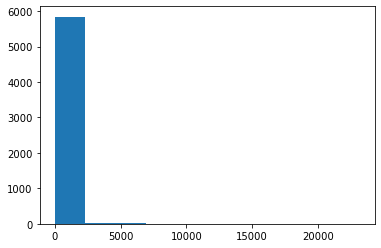

In [14]:
plt.hist(war_and_p_ngram.values())

In [15]:
len(war_and_p_ngram)

5879

In [16]:
war_and_p_ngram['под']

988

In [17]:
war_and_p_ngram['чгк']

KeyError: 'чгк'

In [18]:
def proc_dict(word_dict):
    '''Let's drop the most rare ngrams from the dictionary.'''
    count_to_drop = 3 # I assume that if ngram is more rare than this number, then it has to be droped from the dict
    new_dict = {}
    for key in word_dict:
        if word_dict[key] > count_to_drop:
            new_dict[key] = word_dict[key]
    return new_dict

In [19]:
new_w_a_p_ngram = proc_dict(war_and_p_ngram)

In [20]:
len(new_w_a_p_ngram)

4393

In [21]:
def is_error(word):
    '''is the word with mistake'''
    for j in range (len(word)):
        cur_ngram = word[j:j+ngram]
        #print(cur_ngram, i, j)
        if cur_ngram not in new_w_a_p_ngram:
            print('Might be a problem here, can not find: ', cur_ngram, 'in the dictionary.')
            return

    for k in range(ngram-1):
        cur_ngram = word[:k+1]
        if cur_ngram not in new_w_a_p_ngram:
            print('Might be a problem here, can not find: ', cur_ngram, 'in the dictionary.')
            return
    return print('Everything is all right!')

In [22]:
is_error('ошибка')

Everything is all right!


In [23]:
is_error('ашебка')

Might be a problem here, can not find:  шеб in the dictionary.


### 2.2. Бор
Далее построим бор, с помощью которого будем искать исправления опечатки в слове. Пока только в случае замены и удаления в конце (Если есть желание, то можно и для всех случаев). Также сравнить по времени с поиском в случае замены в исходном слове последних двух символов и поиске в словаре.

In [24]:
import itertools
from itertools import product
from string import ascii_lowercase

In [25]:
class TrieNode:

    def __init__(self, char):
        self.char = char
        self.is_end = False
        self.children = {}

class Trie(object):
    def __init__(self):
        self.root = TrieNode("")
    
    def insert(self, word):
        node = self.root
        
        for char in word:
            if char in node.children:
                node = node.children[char]
            else:
                new_node = TrieNode(char)
                node.children[char] = new_node
                node = new_node
        
        node.is_end = True

    def dfs(self, node, prefix, word, diff, depth):
        if len(word) -1 < depth:
            return
        if not node.is_end:
            prefix_prom = prefix + node.char
            #print('Not end 1:',prefix_prom, depth, word[depth], diff, node.char)
            if word[depth] != node.char:
                diff += 1
            
            #print('Not end 2:',prefix_prom, depth, word[depth], diff, node.char)
            depth += 1
            for child in node.children.values():
                self.dfs(child, prefix_prom, word, diff, depth)
        else:
            
            prefix_prom = prefix + node.char
            #print(prefix_prom, depth)
            #print('end 1:',prefix_prom, depth, word[depth], diff, node.char)
            if word[depth] != node.char:
                diff += 1
            
            diff_prom = diff
            if len(word) > len(prefix_prom):
                diff_prom += len(word) - len(prefix_prom)
            #print('end 2:',prefix_prom, depth, word[depth], diff, node.char)
            depth += 1
            self.output.append([prefix_prom, diff_prom])
            for child in node.children.values():
                self.dfs(child, prefix_prom, word, diff, depth)
        
    def most_similar(self, word):
        '''
        Input: word for comparison
        Output: array with pairs (word in the dictionary, distance)
        '''
        self.output = []
        node = self.root

        prefix = ''
        diff = 0
        depth = 0
        
        for child in node.children.values():
            self.dfs(child, prefix, word, diff, depth)

        return sorted(self.output, key=lambda x: x[1], reverse=False)

Выше описано префиксное дерево с функциями: добавления слова и поиска наиболее похожих слов к заданному.  
Поиск наиболее похожих слов осуществяется по принципу, описанному в семинаре, но я не добавляю ограничение на количество ошибок, а останавливаю алгоритм либо когда ветка оказывается короче длины слова, либо когда ветка длинее данного слова. В целом, я думаю, что это разумно, поскольку на практике мы редко знаем, каков предел человека в способности ошибаться)

Ниже приведен пример, описанный на семанаре...

In [26]:
t = Trie()

In [27]:
t.insert("кошка")

In [28]:
t.insert("кот")

In [29]:
t.insert("кит")

In [30]:
t.insert("пес")

In [31]:
t.most_similar("кон")

[['кот', 1], ['кит', 2], ['пес', 3]]

In [32]:
t.most_similar("кот")

[['кот', 0], ['кит', 1], ['пес', 3]]

А теперь скормим дереву "Войну и мир".

In [33]:
wordlist

['лев',
 'николаевич',
 'толстой',
 'война',
 'и',
 'мир',
 'том',
 'часть',
 'первая',
 'е',
 'поместья',
 'мой',
 'верный',
 'раб',
 'ну',
 'что',
 'князь',
 'генуа',
 'и',
 'лукка',
 'стали',
 'не',
 'больше',
 'как',
 'поместьями',
 'фамилии',
 'бонапарте',
 'нет',
 'я',
 'вас',
 'предупреждаю',
 'если',
 'вы',
 'мне',
 'не',
 'скажете',
 'что',
 'у',
 'нас',
 'война',
 'если',
 'вы',
 'еще',
 'позволите',
 'себе',
 'защищать',
 'все',
 'гадости',
 'все',
 'ужасы',
 'этого',
 'антихриста',
 'право',
 'я',
 'верю',
 'что',
 'он',
 'антихрист',
 'я',
 'вас',
 'больше',
 'не',
 'знаю',
 'вы',
 'уж',
 'не',
 'друг',
 'мой',
 'вы',
 'уж',
 'не',
 'мой',
 'верный',
 'раб',
 'как',
 'вы',
 'говорите',
 'ну',
 'здравствуйте',
 'здравствуйте',
 'я',
 'вижу',
 'что',
 'я',
 'вас',
 'пугаю',
 'садитесь',
 'и',
 'рассказывайте',
 'так',
 'говорила',
 'в',
 'июле',
 'года',
 'известная',
 'анна',
 'павловна',
 'шерер',
 'фрейлина',
 'и',
 'приближенная',
 'императрицы',
 'марии',
 'феодоровны',

In [34]:
t_w_a_p = Trie()

for i in range(len(wordlist)):
    t_w_a_p.insert(wordlist[i])

In [35]:
t_w_a_p.most_similar('война')[0]

['война', 0]

In [36]:
t_w_a_p.most_similar('войkf')[0:10]

[['войн', 2],
 ['война', 2],
 ['войны', 2],
 ['войну', 2],
 ['войне', 2],
 ['войти', 2],
 ['войдя', 2],
 ['войск', 2],
 ['той', 3],
 ['во', 3]]

Как видно, все работает круто 🎉

In [37]:
def correct_word(word):
    '''returns most similar word from dictionary'''
    return t_w_a_p.most_similar(word)[0][0] 

In [38]:
correct_word('лекорство')

'лекарство'

In [39]:
   def correct_word_naive(word):
    '''correct word using generation'''
    if word in wordlist:
        #print ('Word is correct!')
        return word
    a = ord('а')
    alp_str = ''.join([chr(i) for i in range(a,a+32)])
    keywords = [''.join(i) for i in product(alp_str, repeat = 2)]
    words_to_check = []
    for i in range(len(keywords)):
        cur_word = word[:-2] + keywords[i]
        if cur_word in wordlist:
            return cur_word

In [40]:
correct_word_naive('толстой')

'толстой'

In [41]:
correct_word_naive('толстse')

'толстое'

### 2.3 Все вместе
Теперь соберем поиск и исправление опечаток в одну систему, которая будет принимать текст и править его. Также замерим скорость по сравнению с "менее наивным подходом".

In [42]:
def correct_mistakes(text):
    '''returns corrected text'''
    text = text.lower()
    text_arr = re.sub(r'[^А-я]', ' ', text).split()
    correct_text = []
    for i in range(len(text_arr)):
        correct_text.append(correct_word(text_arr[i]))
        
    return ' '.join(correct_text)



In [43]:
test_string = 'ЛеФ ТАлстой напЕсал "ВАйну и мир"!'

In [48]:
%%time
correct_mistakes(test_string)

Wall time: 86.8 ms


'лев толстой написал войну и мир'

In [53]:
def correct_mistakes_naive(text):
    '''returns corrected text using generation'''
    text = text.lower()
    #print(text)
    text_arr = re.sub(r'[^А-я]', ' ', text).split()
    correct_text = []
    for i in range(len(text_arr)):
        correct_text.append(correct_word_naive(text_arr[i]))
        #print(correct_text, correct_word_naive(text_arr[i]), text_arr[i])
        
    return ' '.join(correct_text)

In [54]:
test_string_naiv = 'ЛеФ Толстшщ написал "Войну и мир"!'

In [55]:
%%time
correct_mistakes_naive(test_string_naiv)

Wall time: 658 ms


'лба толстое написал войну и мир'

Хоть в задании и было сказано, что наивный метод должет перебирать комбинации всего двух последних букв (понятно, что ошибки могут быть не только в конце слова), но все равно наивный метод работает дольше.